In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder



In [26]:
datathon =pd.read_csv(r"C:\Users\HP\Downloads\train.csv")
datathon.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,NaN,NaN,NaN,NaN,NaN,6.3,31.0,16.0,NaN,NaN,NaN,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1


In [27]:
sum(datathon.duplicated())

3

In [28]:
#print(datathon.duplicated())

In [29]:
#duplicate removal
datathon.drop_duplicates(inplace=True)

In [30]:
sum(datathon.duplicated())

0

In [31]:
datathon.shape

(220, 16)

In [32]:
datathon['Lymphocytes']= pd.to_numeric(datathon['Lymphocytes'], errors='coerce')

datathon

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,NaN,NaN,NaN,NaN,NaN,6.3,31.0,16.0,NaN,NaN,NaN,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,M,57,6.8,172.0,6.2,0.3,0.3,0.1,0.0,27.6,83.0,137.0,92.0,NaN,455.0,1
219,F,72,10.1,245.0,NaN,NaN,NaN,NaN,NaN,49.6,28.0,22.0,NaN,NaN,328.0,0
220,F,79,6.4,170.0,5.0,0.6,0.7,0.0,0.0,2.0,70.0,45.0,NaN,NaN,NaN,0
221,M,80,11.0,285.0,9.3,0.6,1.1,0.0,0.0,135.1,34.0,20.0,NaN,NaN,369.0,1


In [33]:
#thresh = number of valid features
datathon.dropna(thresh=5,inplace=True)

In [34]:
datathon.shape

(219, 16)

In [35]:
datathon.isnull().sum() 

GENDER           0
AGE              0
WBC              1
Platelets        1
Neutrophils     56
Lymphocytes     57
Monocytes       56
Eosinophils     56
Basophils       57
CRP              3
AST              0
ALT              7
ALP            114
GGT            108
LDH             63
Class            0
dtype: int64

In [36]:
#d=datathon.drop(columns=["GGT","ALP"])

In [37]:
#d.shape

In [38]:
#print(d)

In [39]:
datathon.isnull().sum() 

GENDER           0
AGE              0
WBC              1
Platelets        1
Neutrophils     56
Lymphocytes     57
Monocytes       56
Eosinophils     56
Basophils       57
CRP              3
AST              0
ALT              7
ALP            114
GGT            108
LDH             63
Class            0
dtype: int64

<AxesSubplot:>

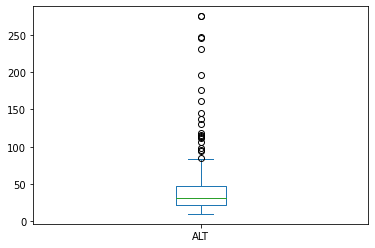

In [40]:
datathon["ALT"].plot(kind ="box")

In [41]:
#Z=datathon.fillna(datathon.mean())

In [42]:
#Z.isnull().sum() 

In [43]:
#datathon =datathon.drop(columns=["Lymphocytes"])
#for i in datathon["Lymphocytes"]:
 #   i=i.replace("-",".")
  #  i=float(i)  

In [44]:
#print(d)

In [45]:
#d.isnull().sum()

In [46]:
datathon['Basophils'].fillna(datathon['Basophils'].mode()[0],inplace=True)
print( datathon['Basophils'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
218    0.0
219    0.0
220    0.0
221    0.0
222    0.0
Name: Basophils, Length: 219, dtype: float64


In [47]:
datathon['Lymphocytes'].fillna(datathon['Lymphocytes'].mode()[0],inplace=True)
print( datathon['Lymphocytes'])

0      0.7
1      0.5
2      1.0
3      1.0
4      0.5
      ... 
218    0.3
219    1.0
220    0.6
221    0.6
222    1.1
Name: Lymphocytes, Length: 219, dtype: float64


In [48]:
datathon.isnull().sum() 

GENDER           0
AGE              0
WBC              1
Platelets        1
Neutrophils     56
Lymphocytes      0
Monocytes       56
Eosinophils     56
Basophils        0
CRP              3
AST              0
ALT              7
ALP            114
GGT            108
LDH             63
Class            0
dtype: int64

In [49]:
datathon['Eosinophils'].fillna(datathon['Eosinophils'].mode()[0],inplace=True)
print( datathon['Eosinophils'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
218    0.1
219    0.0
220    0.0
221    0.0
222    0.0
Name: Eosinophils, Length: 219, dtype: float64


In [50]:
#changed from median to mean
datathon['Monocytes'].fillna(datathon['Monocytes'].mean(),inplace=True)
print( datathon['Monocytes'])
#a=datathon["Monocytes"]
#a=datathon["Monocytes"].interpolate(method="polynomial",order=2)
#datathon["Monocytes"] =a
#print(datathon["Monocytes"])

0      0.300000
1      0.100000
2      0.800000
3      0.598773
4      0.200000
         ...   
218    0.300000
219    0.598773
220    0.700000
221    1.100000
222    0.400000
Name: Monocytes, Length: 219, dtype: float64


In [51]:
#datathon['Neutrophils'].fillna(datathon['Neutrophils'].median(),inplace=True)
#print( datathon['Neutrophils'])
a=datathon["Neutrophils"].interpolate(method="polynomial",order=2)
datathon["Neutrophils"] = a
print(datathon["Neutrophils"])

0       4.000000
1      10.700000
2      13.900000
3       8.519223
4       3.800000
         ...    
218     6.200000
219     5.913009
220     5.000000
221     9.300000
222     9.100000
Name: Neutrophils, Length: 219, dtype: float64


In [52]:
datathon.isnull().sum() 

GENDER           0
AGE              0
WBC              1
Platelets        1
Neutrophils      0
Lymphocytes      0
Monocytes        0
Eosinophils      0
Basophils        0
CRP              3
AST              0
ALT              7
ALP            114
GGT            108
LDH             63
Class            0
dtype: int64

In [53]:
#datathon['LDH'].fillna(datathon['LDH'].mean(),inplace=True)
#print(datathon['LDH'])
a=datathon["LDH"].interpolate(method="polynomial",order=2)
datathon["LDH"] =a
print(datathon["LDH"])

0      606.000000
1      808.000000
2      235.000000
3      326.717922
4      626.000000
          ...    
218    455.000000
219    328.000000
220    282.039131
221    369.000000
222    601.000000
Name: LDH, Length: 219, dtype: float64


In [54]:
datathon['GGT'].fillna(datathon['GGT'].mean(),inplace=True)
print(datathon['GGT'])
'''a=datathon["GGT"].interpolate(method="polynomial",order=2)
datathon["GGT"] =a
print(datathon["GGT"])'''

0      63.000000
1      77.000000
2      16.000000
3      83.621622
4      19.000000
         ...    
218    83.621622
219    83.621622
220    83.621622
221    83.621622
222    83.621622
Name: GGT, Length: 219, dtype: float64


'a=datathon["GGT"].interpolate(method="polynomial",order=2)\ndatathon["GGT"] =a\nprint(datathon["GGT"])'

In [55]:
datathon['ALP'].fillna(datathon['ALP'].mean(),inplace=True)
print(datathon['ALP'])
'''a=datathon["ALP"].interpolate(method="polynomial",order=2)
datathon["ALP"] =a
print(datathon["ALP"])'''

0      89.00000
1      59.00000
2      80.00000
3      95.12381
4      81.00000
         ...   
218    92.00000
219    95.12381
220    95.12381
221    95.12381
222    95.12381
Name: ALP, Length: 219, dtype: float64


'a=datathon["ALP"].interpolate(method="polynomial",order=2)\ndatathon["ALP"] =a\nprint(datathon["ALP"])'

In [56]:
#datathon['Lymphocytes'].fillna(datathon['Lymphocytes'].mode()[0],inplace=True)
#print(datathon['Lymphocytes'])

In [57]:
datathon['WBC'].fillna(datathon['WBC'].mode()[0],inplace=True)
print(datathon['WBC'])

0       4.9
1      11.3
2      15.8
3      10.6
4       4.5
       ... 
218     6.8
219    10.1
220     6.4
221    11.0
222    10.7
Name: WBC, Length: 219, dtype: float64


In [58]:
datathon['Platelets'].fillna(datathon['Platelets'].mode()[0],inplace=True)
print(datathon['Platelets'])

0      145.0
1      166.0
2      202.0
3      227.0
4      170.0
       ...  
218    172.0
219    245.0
220    170.0
221    285.0
222    176.0
Name: Platelets, Length: 219, dtype: float64


In [59]:
datathon['ALT'].fillna(datathon['ALT'].mean(),inplace=True)
print(datathon['ALT'])

0       41.0
1       95.0
2       26.0
3       16.0
4       17.0
       ...  
218    137.0
219     22.0
220     45.0
221     20.0
222     35.0
Name: ALT, Length: 219, dtype: float64


In [60]:
datathon['CRP'].fillna(datathon['CRP'].median(),inplace=True)
print(datathon['CRP'])

0       87.9
1      174.3
2       43.8
3        6.3
4      133.6
       ...  
218     27.6
219     49.6
220      2.0
221    135.1
222    129.6
Name: CRP, Length: 219, dtype: float64


In [61]:
datathon.isnull().sum() 

GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
ALP            0
GGT            0
LDH            0
Class          0
dtype: int64

In [62]:
print(datathon)

    GENDER  AGE   WBC  Platelets  Neutrophils  Lymphocytes  Monocytes  \
0        F   70   4.9      145.0     4.000000          0.7   0.300000   
1        M   61  11.3      166.0    10.700000          0.5   0.100000   
2        F   70  15.8      202.0    13.900000          1.0   0.800000   
3        M   85  10.6      227.0     8.519223          1.0   0.598773   
4        F   89   4.5      170.0     3.800000          0.5   0.200000   
..     ...  ...   ...        ...          ...          ...        ...   
218      M   57   6.8      172.0     6.200000          0.3   0.300000   
219      F   72  10.1      245.0     5.913009          1.0   0.598773   
220      F   79   6.4      170.0     5.000000          0.6   0.700000   
221      M   80  11.0      285.0     9.300000          0.6   1.100000   
222      F   57  10.7      176.0     9.100000          1.1   0.400000   

     Eosinophils  Basophils    CRP    AST    ALT       ALP        GGT  \
0            0.0        0.0   87.9   68.0   41.0  

In [63]:
#datathon=datathon.drop(columns=['Lymphocytes'])

In [64]:
#import pandas as pd
#dataset =pd.read_csv(r"C:\Users\HP\Downloads\911_1.csv",index_col=0)
# x=datathon.iloc[:,:].values 
#print(x[:,0])
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
datathon['GENDER']= label_encoder.fit_transform(datathon['GENDER'])

In [65]:
datathon["GENDER"].isnull().sum()

0

In [66]:
datathon.GENDER.value_counts()

1    147
0     72
Name: GENDER, dtype: int64

In [67]:
datathon.isnull().sum()

GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
ALP            0
GGT            0
LDH            0
Class          0
dtype: int64

In [68]:
#datathon['Lymphocytes']=datathon['Lymphocytes'].astype(float)
#datathon['Lymphocytes']=pd.to_numeric(datathon['Lymphocytes'],errors ='coerce')

In [69]:
datathon

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,0,70,4.9,145.0,4.000000,0.7,0.300000,0.0,0.0,87.9,68.0,41.0,89.00000,63.000000,606.000000,1
1,1,61,11.3,166.0,10.700000,0.5,0.100000,0.0,0.0,174.3,118.0,95.0,59.00000,77.000000,808.000000,1
2,0,70,15.8,202.0,13.900000,1.0,0.800000,0.0,0.0,43.8,20.0,26.0,80.00000,16.000000,235.000000,0
3,1,85,10.6,227.0,8.519223,1.0,0.598773,0.0,0.0,6.3,31.0,16.0,95.12381,83.621622,326.717922,0
4,0,89,4.5,170.0,3.800000,0.5,0.200000,0.0,0.0,133.6,57.0,17.0,81.00000,19.000000,626.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,57,6.8,172.0,6.200000,0.3,0.300000,0.1,0.0,27.6,83.0,137.0,92.00000,83.621622,455.000000,1
219,0,72,10.1,245.0,5.913009,1.0,0.598773,0.0,0.0,49.6,28.0,22.0,95.12381,83.621622,328.000000,0
220,0,79,6.4,170.0,5.000000,0.6,0.700000,0.0,0.0,2.0,70.0,45.0,95.12381,83.621622,282.039131,0
221,1,80,11.0,285.0,9.300000,0.6,1.100000,0.0,0.0,135.1,34.0,20.0,95.12381,83.621622,369.000000,1


In [70]:
#CLASSIFYING 1-covid 
from sklearn.model_selection import train_test_split
X = datathon.drop(columns=["Class"])  
Y = datathon["Class"] 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=24)
print(X.shape)

(219, 15)


In [71]:
X_train.shape ,Y_train.shape   

((175, 15), (175,))

# RandomForestClassifier along with  MCC

In [72]:
#rf=RandomForestClassifier()
#rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                             #  random_state=100,n_jobs=-1)
### fit the randomized model
#rf_randomcv.fit(X_train,y_train)
#working
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=24,)
rf_model.fit(X_train,Y_train) 
#pred =rf_model.predict(X_test)
#print("Accuracy ",accuracy_score(Y_test , pred ) )

RandomForestClassifier(random_state=24)

In [73]:
# import pickle  #repeat
# #filename = 'violet_diamond.pkl'
# #pickle.dump(rf_model,open(filename,'wb'))
# '''filename = 'orange_.pkl'
# pickle.dump(rf_model, open(filename, "wb"))
# loaded_model = pickle.load(open(filename, "rb"))
# #loaded_model.predict(X_test)
# #rf_model.predict(X_test)
# loaded_model.predict(X_test)
# #print(result)'''

In [74]:
import pickle
#from sklearn.svm import SVC
rf_model

RandomForestClassifier(random_state=24)

In [75]:
pickle.dump(rf_model,open("rollmodel.pkl","wb"))

In [76]:
loaded_model=pickle.load(open("rollmodel.pkl","rb"))

In [77]:
loaded_model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [78]:
rf_model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [79]:
temp = {}
temp['GENDER'] = 1
temp['AGE'] = 2
temp['WBC'] = 3
temp['Platelets'] = 4
temp['Neutrophils'] = 4
temp['Lymphocytes'] = 1
temp['Monocytes'] = 1
temp['Eosinophils'] = 5
temp['Basophils'] = 6
temp['CRP'] = 1
temp['AST'] = 5
temp['ALT'] = 1
temp['ALP'] = 11
temp['GGT'] = 1
temp['LDH'] = 10


In [81]:
td = pd.DataFrame({'x':temp}).transpose()
print(td)

   AGE  ALP  ALT  AST  Basophils  CRP  Eosinophils  GENDER  GGT  LDH  \
x    2   11    1    5          6    1            5       1    1   10   

   Lymphocytes  Monocytes  Neutrophils  Platelets  WBC  
x            1          1            4          4    3  


In [82]:
rf_model.predict(td)[0]

0